In [5]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set(style="whitegrid")
except ImportError:
    sns = None
    print("Seaborn not installed – using plain Matplotlib plots.")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Notebook launched from: Deep_Learning_project/notebooks
PROJECT_ROOT = os.path.abspath("..")
print("PROJECT_ROOT:", PROJECT_ROOT)


def load_run_metrics(run_name):
    """
    Charge les CSV d'un run donné :
    - test_overall_metrics.csv
    - test_per_class_metrics.csv
    - test_predictions.csv
    """
    base_dir = os.path.join(PROJECT_ROOT, "experiments", "evaluation", run_name)
    overall_path = os.path.join(base_dir, "test_overall_metrics.csv")
    per_class_path = os.path.join(base_dir, "test_per_class_metrics.csv")
    preds_path = os.path.join(base_dir, "test_predictions.csv")

    print(f"\n=== {run_name} ===")
    print("BASE_DIR    :", base_dir)
    print("overall     :", os.path.exists(overall_path))
    print("per_class   :", os.path.exists(per_class_path))
    print("preds       :", os.path.exists(preds_path))

    overall_df = pd.read_csv(overall_path) if os.path.exists(overall_path) else None
    per_class_df = pd.read_csv(per_class_path) if os.path.exists(per_class_path) else None
    preds_df = pd.read_csv(preds_path) if os.path.exists(preds_path) else None

    return overall_df, per_class_df, preds_df


PROJECT_ROOT: c:\Users\mathy\OneDrive - Groupe INSEEC (POCE)\Bureau\Centrale\Deep Learning\Deep_Learning_project


In [10]:
RUNS = {
    "MainCNN – 20 epochs":   "main_cnn_20epochs",
    "MainCNN – 150 epochs":  "main_cnn_150epochs"
}

summary_rows = {}
per_class_dict = {}
preds_dict = {}  # pour confusion matrix ensuite

for nice_name, run_name in RUNS.items():
    overall_df, per_class_df, preds_df = load_run_metrics(run_name)

    if overall_df is None:
        print(f"⚠ No overall metrics for {run_name}, skipping.")
        continue

    acc = overall_df["accuracy"].iloc[0]
    bal_acc = overall_df["balanced_accuracy"].iloc[0]
    macro_f1 = overall_df["macro_f1"].iloc[0]
    w_f1 = overall_df["weighted_f1"].iloc[0]

    summary_rows[nice_name] = {
        "accuracy": acc,
        "balanced_accuracy": bal_acc,
        "macro_f1": macro_f1,
        "weighted_f1": w_f1,
    }

    per_class_dict[nice_name] = per_class_df
    preds_dict[nice_name] = preds_df

summary_df = pd.DataFrame(summary_rows).T
display(summary_df.style.format("{:.4f}"))



=== main_cnn_20epochs ===
BASE_DIR    : c:\Users\mathy\OneDrive - Groupe INSEEC (POCE)\Bureau\Centrale\Deep Learning\Deep_Learning_project\experiments\evaluation\main_cnn_20epochs
overall     : True
per_class   : True
preds       : True

=== main_cnn_150epochs ===
BASE_DIR    : c:\Users\mathy\OneDrive - Groupe INSEEC (POCE)\Bureau\Centrale\Deep Learning\Deep_Learning_project\experiments\evaluation\main_cnn_150epochs
overall     : True
per_class   : True
preds       : True


,accuracy,balanced_accuracy,macro_f1,weighted_f1
MainCNN – 20 epochs,0.2132,0.2144,0.1633,0.1961
MainCNN – 150 epochs,0.5511,0.5465,0.4911,0.5337


In [ ]:
best_run_name = "MainCNN – 150 epochs" 
best_preds_df = preds_dict[best_run_name]

print(best_preds_df.head())
print(best_preds_df.columns)


   y_true  y_pred  correct  prob_neutral  prob_happy  prob_sad  prob_surprise  \
0       3       3     True      0.006063    0.002094  0.004956       0.881008   
1       2       0    False      0.460445    0.149376  0.189034       0.005735   
2       6       6     True      0.106864    0.041824  0.245977       0.004985   
3       1       1     True      0.069198    0.579786  0.075210       0.009439   
4       2       0    False      0.447452    0.016296  0.145661       0.069819   

   prob_fear  prob_disgust  prob_anger  
0   0.086037      0.009830    0.010011  
1   0.065218      0.010535    0.119657  
2   0.076917      0.071986    0.451447  
3   0.083901      0.055365    0.127101  
4   0.234115      0.003078    0.083579  
Index(['y_true', 'y_pred', 'correct', 'prob_neutral', 'prob_happy', 'prob_sad',
       'prob_surprise', 'prob_fear', 'prob_disgust', 'prob_anger'],
      dtype='object')


<Figure size 700x600 with 0 Axes>

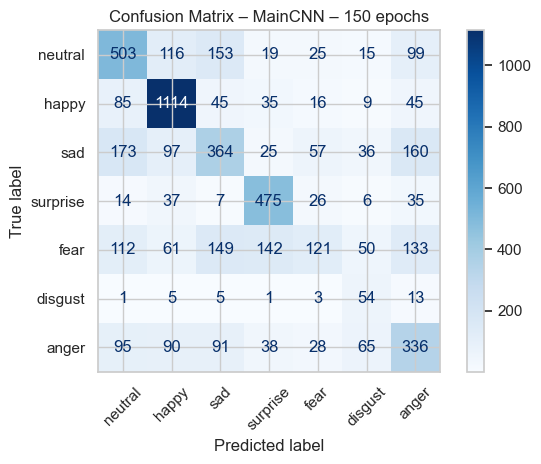

In [ ]:
true_label_col = "y_true"   
pred_label_col = "y_pred"   

y_true = best_preds_df[true_label_col].to_numpy()
y_pred = best_preds_df[pred_label_col].to_numpy()

# Si tu as aussi les noms d'émotions quelque part
class_names = ["neutral", "happy", "sad", "surprise", "fear", "disgust", "anger"]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(7, 6))
disp.plot(values_format="d", cmap="Blues", xticks_rotation=45)
plt.title(f"Confusion Matrix – {best_run_name}")
plt.tight_layout()
plt.show()
